In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-bright')
from obspy.imaging.beachball import beach

noto_hanto = {'coordinates':(136.686000, 37.220667), 'time':'2007-03-25 00:41:57.909996'
              , 'tz':'UTC', 'magnitude':6.9, 'name':'Noto Hanto', 'focal_mech':[34, 40, 108]}
western_tottori = {'coordinates':(133.349, 35.274167), 'time':'2000-10-06 04:30:17.940011'
                   , 'tz':'UTC', 'magnitude':6.7, 'name':'Western Tottori', 'focal_mech':[331, 83, 1]}
sugura_bay = {'coordinates':(138.499333, 34.786167), 'time':'2009-08-10 20:07:05.740017'
              , 'tz':'UTC', 'magnitude':6.5, 'name':'Suruga Bay', 'focal_mech':[88, 51, 63]}
iwaki = {'coordinates':(140.672667, 36.945667), 'time':'2011-04-11 08:16:12.020008'
         , 'tz':'UTC', 'magnitude':6.6, 'name':'Iwaki', 'focal_mech':[139    ,53   ,-75]}
iwate_miyage = {'coordinates':(140.880667, 39.029833), 'time':'2008-06-13 23:43:45.359992'
                , 'tz':'UTC', 'magnitude':6.8, 'name':'Iwate Miyagi', 'focal_mech':[17  ,  42  , 87]}
kumamoto = {'coordinates':(130.763, 32.7545), 'time':'2016-04-14 12:26:00'
            , 'tz':'UTC', 'magnitude':7.0, 'name':'Kumamoto', 'focal_mech':[128  , 71 , -14]}
tohoku = {'coordinates':(142.861000, 38.103500), 'time':'2011-03-11 05:46:18.119983'
          , 'tz':'UTC', 'magnitude':9.0, 'name':'Tohoku-oki'}

eqs = {'suruga-bay':sugura_bay, 'iwaki':iwaki, 'iwate-miyage':iwate_miyage
      ,'kumamoto':kumamoto, 'noto-hanto':noto_hanto, 'western-tottori':western_tottori}

def plot_beach_ball(earthquake, m, ax, **kwargs):
    lon, lat = earthquake['coordinates']
    x, y = m(lon, lat)
    b = beach(earthquake['focal_mech'], xy=(x, y), width=earthquake['magnitude']/50., **kwargs)
    b.set_zorder(10)
    ax.add_collection(b)
    
df = import_export.import_catalog(location='data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])

df = df[df.depth <= 25]

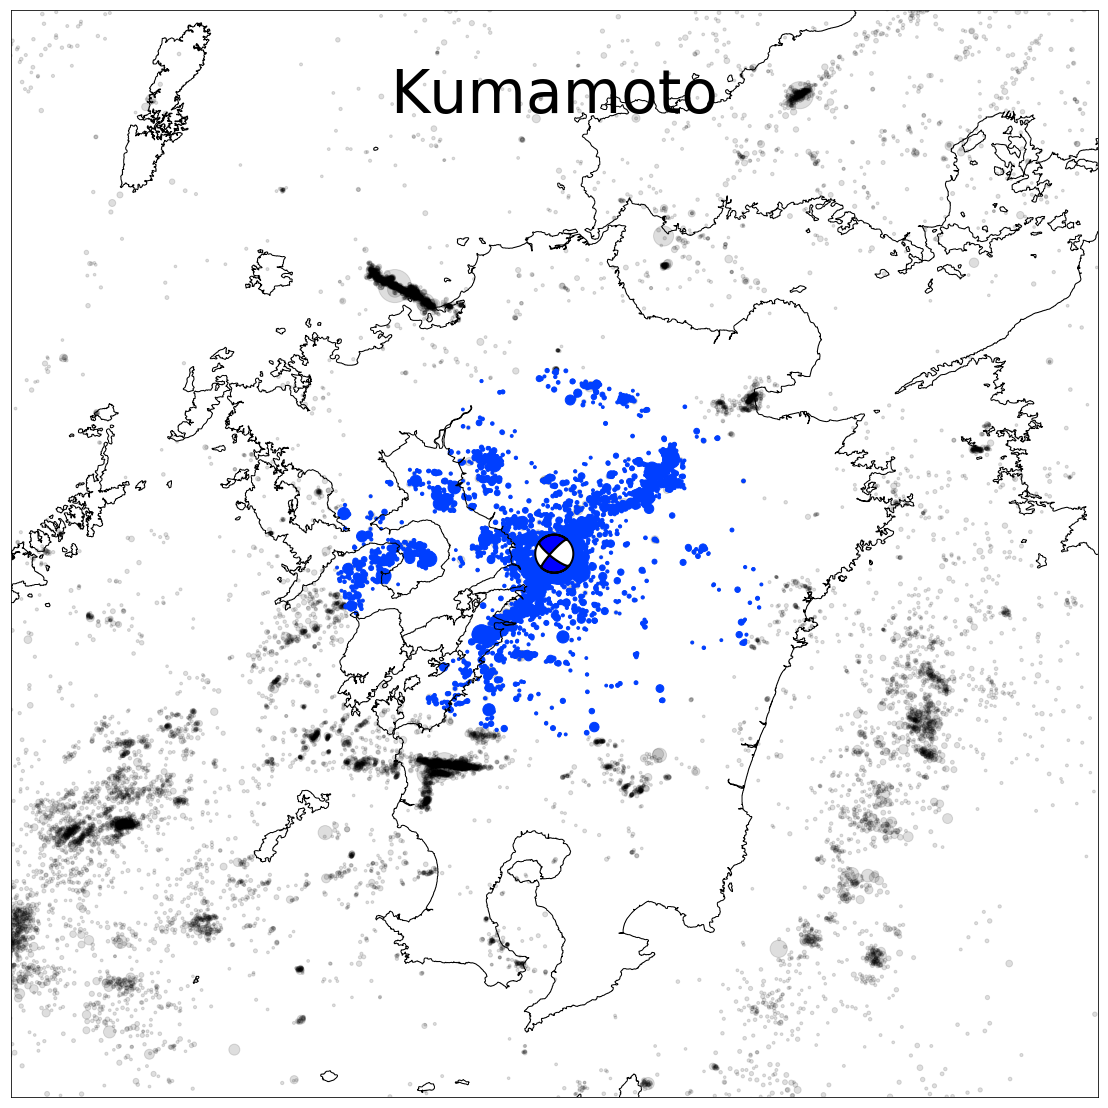

In [36]:
eq = eqs['kumamoto']

data = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=500, m=1)
data = data.loc[data.index <= eq['time']]

fig, ax = plt.subplots(1, figsize=(20,20))


lon, lat = eq['coordinates']


m = Basemap(llcrnrlon=lon-2
            ,llcrnrlat=lat-2
            ,urcrnrlon=lon+2
            ,urcrnrlat=lat+2
            , epsg=4269
            , ax=ax
            , resolution='f'
            , area_thresh=1)

m.drawcoastlines()

#### DATA USED FOR CALCULATIONS
data2 = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=75, m=1)

lons = data2[data2.mag >= 2]['lon'].values
lats = data2[data2.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=1)

#### DATA OUTSIDE OF SELECTION PERIMETER

lons = data[data.mag >= 2]['lon'].values
lats = data[data.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=0, color='black', alpha=0.13)

plot_beach_ball(earthquake=eq, m=m, ax=ax)
ax.set_title(eq['name'], fontsize=60, y=0.9)

for fault in fault_coordinates:
    x, y = m(fault[:,0], fault[:,1])
    ax.plot(x, y, color='black', linewidth=2)

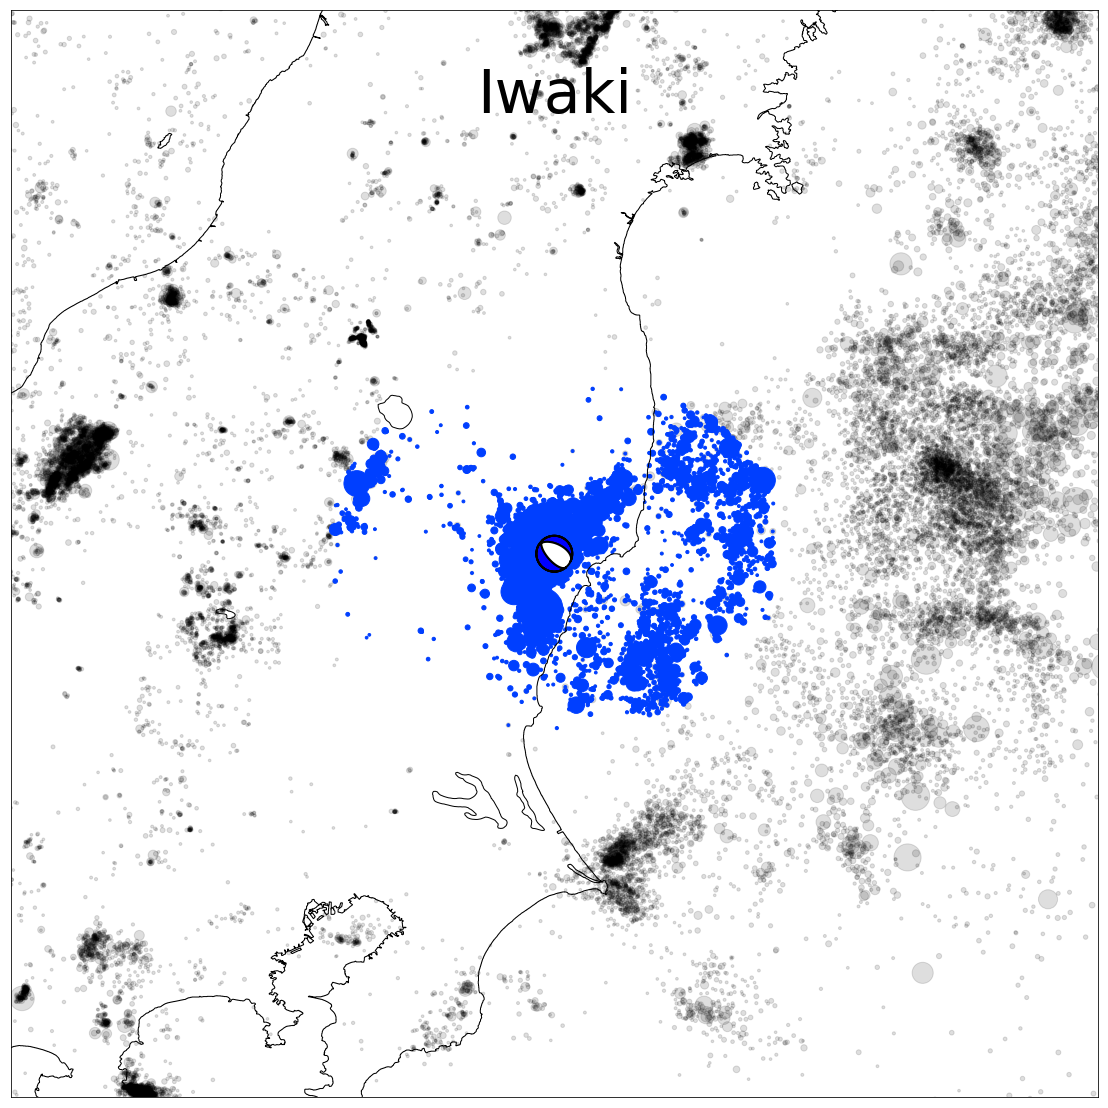

In [37]:
eq = eqs['iwaki']

data = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=500, m=1)
data = data.loc[data.index <= eq['time']]

fig, ax = plt.subplots(1, figsize=(20,20))


lon, lat = eq['coordinates']


m = Basemap(llcrnrlon=lon-2
            ,llcrnrlat=lat-2
            ,urcrnrlon=lon+2
            ,urcrnrlat=lat+2
            , epsg=4269
            , ax=ax
            , resolution='f'
            , area_thresh=1)

m.drawcoastlines()

#### DATA USED FOR CALCULATIONS
data2 = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=75, m=1)

lons = data2[data2.mag >= 2]['lon'].values
lats = data2[data2.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=1)

#### DATA OUTSIDE OF SELECTION PERIMETER

lons = data[data.mag >= 2]['lon'].values
lats = data[data.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=0, color='black', alpha=0.13)

plot_beach_ball(earthquake=eq, m=m, ax=ax)
ax.set_title(eq['name'], fontsize=60, y=0.9)

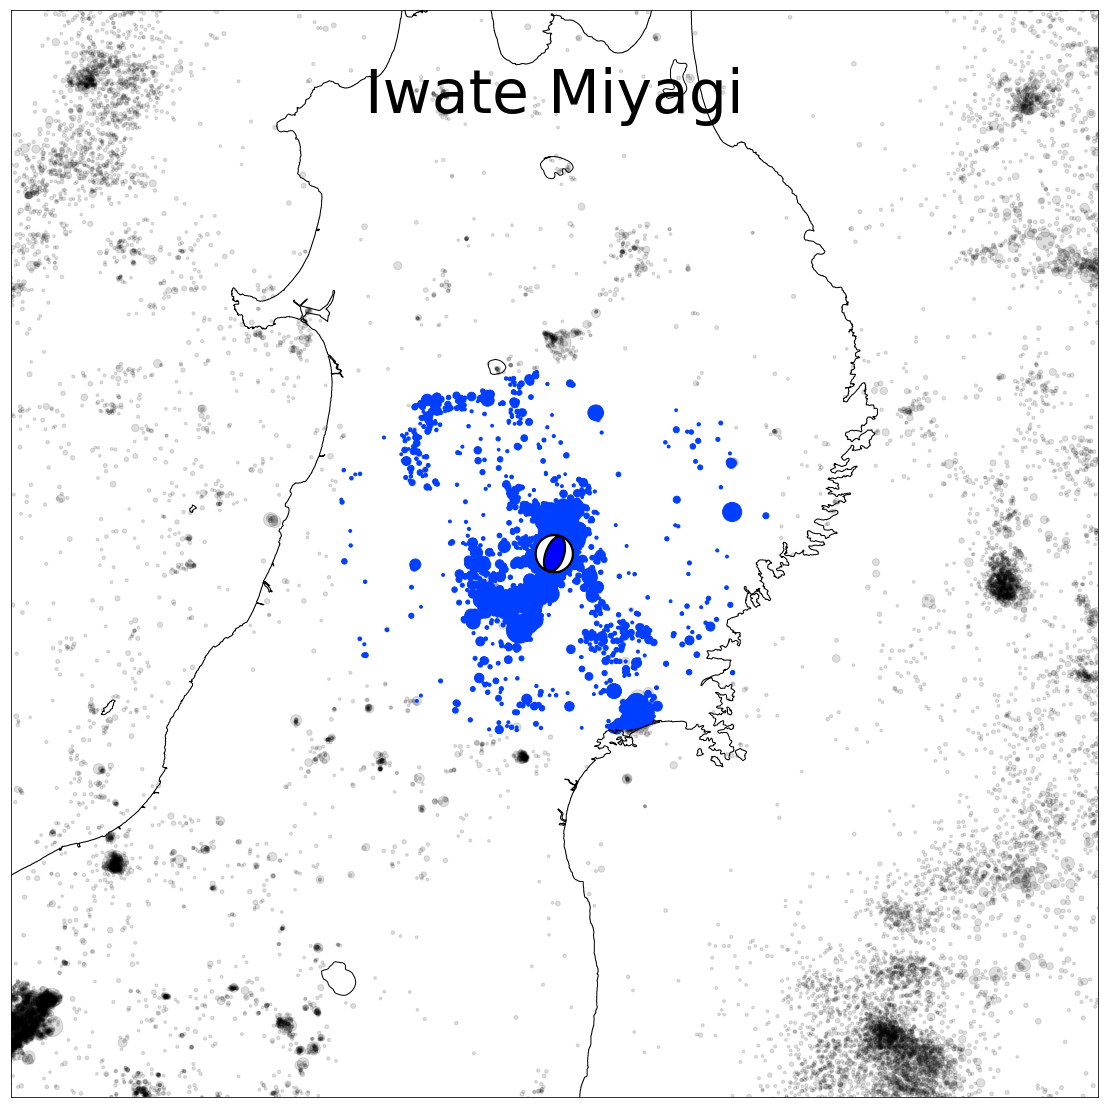

In [38]:
eq = eqs['iwate-miyage']

data = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=500, m=1)
data = data.loc[data.index <= eq['time']]

fig, ax = plt.subplots(1, figsize=(20,20))


lon, lat = eq['coordinates']


m = Basemap(llcrnrlon=lon-2
            ,llcrnrlat=lat-2
            ,urcrnrlon=lon+2
            ,urcrnrlat=lat+2
            , epsg=4269
            , ax=ax
            , resolution='f'
            , area_thresh=1)

m.drawcoastlines()

#### DATA USED FOR CALCULATIONS
data2 = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=75, m=1)

lons = data2[data2.mag >= 2]['lon'].values
lats = data2[data2.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=1)

#### DATA OUTSIDE OF SELECTION PERIMETER

lons = data[data.mag >= 2]['lon'].values
lats = data[data.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=0, color='black', alpha=0.13)

plot_beach_ball(earthquake=eq, m=m, ax=ax)
ax.set_title(eq['name'], fontsize=60, y=0.9)

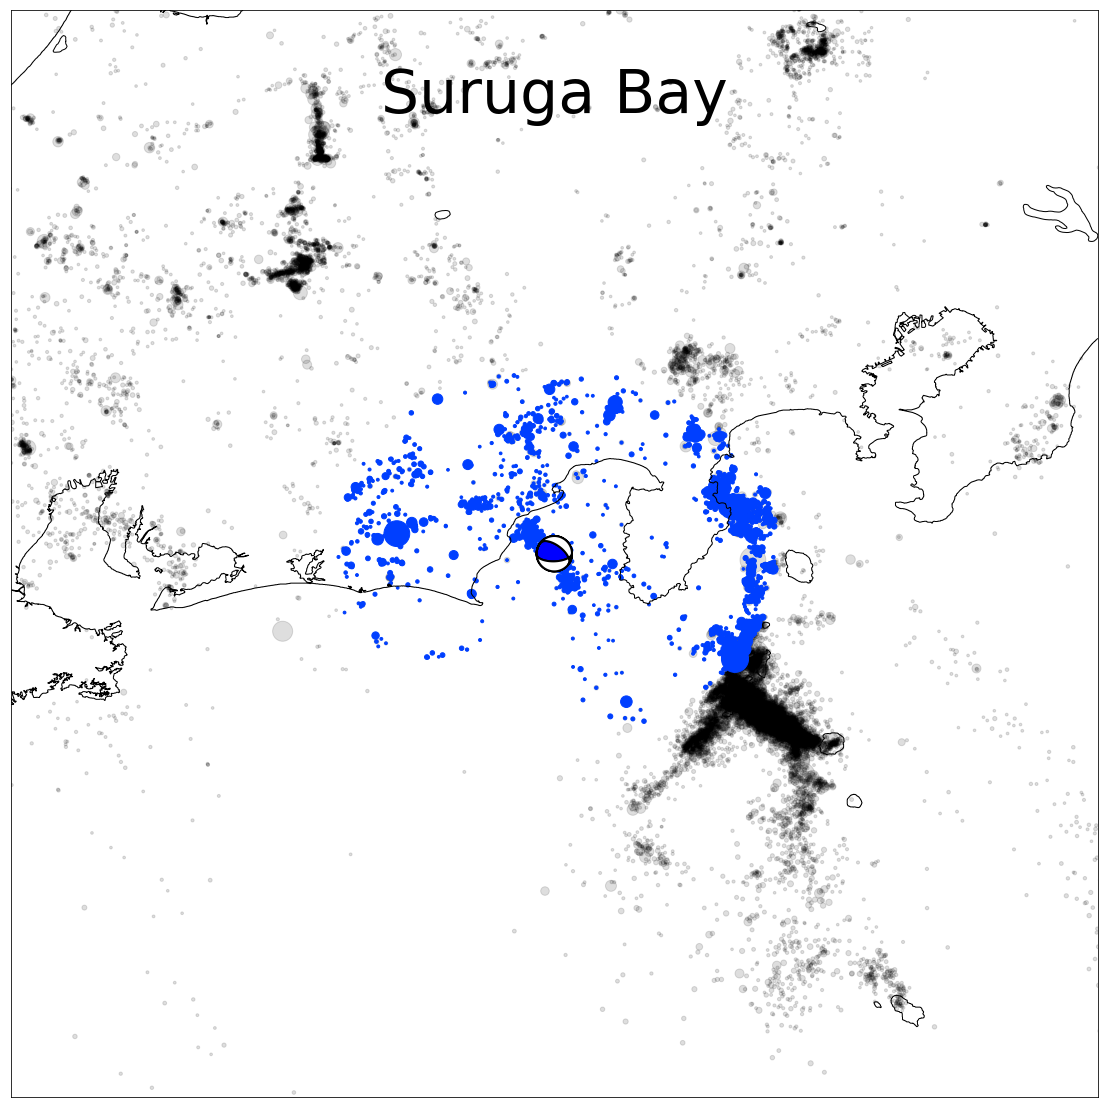

In [39]:
eq = eqs['suruga-bay']

data = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=500, m=1)
data = data.loc[data.index <= eq['time']]

fig, ax = plt.subplots(1, figsize=(20,20))


lon, lat = eq['coordinates']


m = Basemap(llcrnrlon=lon-2
            ,llcrnrlat=lat-2
            ,urcrnrlon=lon+2
            ,urcrnrlat=lat+2
            , epsg=4269
            , ax=ax
            , resolution='f'
            , area_thresh=1)

m.drawcoastlines()

#### DATA USED FOR CALCULATIONS
data2 = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=75, m=1)

lons = data2[data2.mag >= 2]['lon'].values
lats = data2[data2.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=1)

#### DATA OUTSIDE OF SELECTION PERIMETER

lons = data[data.mag >= 2]['lon'].values
lats = data[data.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=0, color='black', alpha=0.13)

plot_beach_ball(earthquake=eq, m=m, ax=ax)
ax.set_title(eq['name'], fontsize=60, y=0.9)

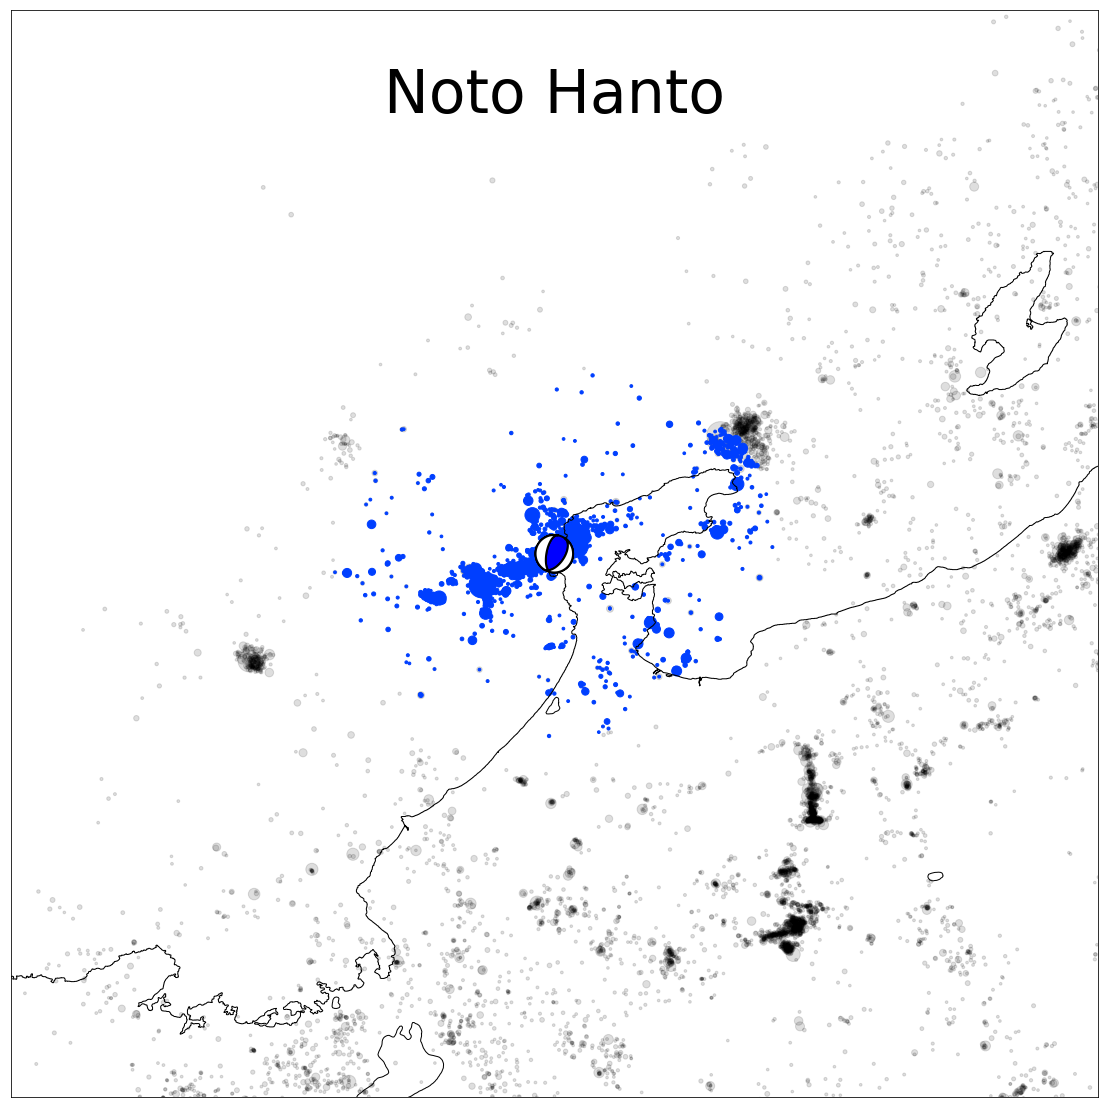

In [40]:
eq = eqs['noto-hanto']

data = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=500, m=1)
data = data.loc[data.index <= eq['time']]

fig, ax = plt.subplots(1, figsize=(20,20))


lon, lat = eq['coordinates']


m = Basemap(llcrnrlon=lon-2
            ,llcrnrlat=lat-2
            ,urcrnrlon=lon+2
            ,urcrnrlat=lat+2
            , epsg=4269
            , ax=ax
            , resolution='f'
            , area_thresh=1)

m.drawcoastlines()

#### DATA USED FOR CALCULATIONS
data2 = polygon_selection.get_node_data(node=eq['coordinates'], data=df, radius=75, m=1)

lons = data2[data2.mag >= 2]['lon'].values
lats = data2[data2.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=1)

#### DATA OUTSIDE OF SELECTION PERIMETER

lons = data[data.mag >= 2]['lon'].values
lats = data[data.mag >= 2]['lat'].values

x, y = m(lons, lats)

ax.scatter(x, y, s=np.exp(data[data.mag>=2].mag.values), zorder=0, color='black', alpha=0.13)

plot_beach_ball(earthquake=eq, m=m, ax=ax)
ax.set_title(eq['name'], fontsize=60, y=0.9)